In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

## Hypothesis: singleton density is depleted by negative selection 

Negative selection acts in two ways: 

1. it turns doubleton sites into singleton sites, tending to increase the singleton count
2. it turns singleton sites into monomorphic sites, tending to decrease the singleton count 

Current studies focus on point (2), correctly inferring that monomorphic sites must increase in number, or, equivalently, polymorphic sites (singleton, doubleton, tripleton, etc) deplete in response to negative selection. 

We went one step further, and asked for the expected effect on singleton count too. 
Since singleton counts are observed to outnumber doubleton sites in typical allele frequency spectra, 
we reasoned that outflux from the singleton category would exceed its influx, leading to a net decrease in singleton count. In our model, this corresponds to `K_bar < 0`. 

## z-scores for SNV density and singleton density, and GeneHancer enhancer overlap amounts, for noncoding trustworthy windows

Chen et al paper is at: 
https://github.com/quinlan-lab/constraint-tools/tree/main/literature/germline/chen%20et%20al%202022

I used the following script to compute the z-scores that are "common" to Chen et al and McHale et al: 

```
experiments/germline-model/chen-et-al-2022/compute-overlapping-zscores.sh
```

I used the following script to show that GeneHancer enhancers are non-overlapping: 

```
experiments/germline-model/chen-et-al-2022/GeneHancer-enhancers-dont-overlap.sh
```

I used the following script to compute the number of bps of each Chen window that is covered by each GeneHancer enhancer:

```
experiments/germline-model/chen-et-al-2022/add-GeneHancer-enhancer-overlapAmounts.sh
```


In [2]:
# enhancer_size_bounds = "0,750"
# min_window_enhancer_overlap = 50

# enhancer_size_bounds = "750,100000"
# min_window_enhancer_overlap = 500

enhancer_size_bounds = "0,100000"
min_window_enhancer_overlap = 100


In [3]:
import pandas as pd 

def get_chen_mchale_GeneHancer_enhancers():
    CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'
    filename = f'{CONSTRAINT_TOOLS_DATA}/benchmark-genome-wide-predictions/chen-et-al-2022/chen-mchale.GeneHancer-enhancers.{enhancer_size_bounds}.overlapAmounts.bed'
    df = pd.read_csv(filename, sep='\t')
    return df

chen_mchale_zscores_GeneHancer_enhancers = get_chen_mchale_GeneHancer_enhancers()

print(f'There are {len(chen_mchale_zscores_GeneHancer_enhancers)} Chen windows')

print(f'Here are the Chen windows that overlap multiple enhancers:') 
chen_mchale_zscores_GeneHancer_enhancers[
    chen_mchale_zscores_GeneHancer_enhancers.duplicated(
        subset=['chromosome', 'chen_start'], 
        keep=False
    )
]

There are 263351 Chen windows
Here are the Chen windows that overlap multiple enhancers:


<ipython-input-3-ac934699c554>:9: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  chen_mchale_zscores_GeneHancer_enhancers = get_chen_mchale_GeneHancer_enhancers()


,chromosome,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,chen_mchale_overlap_bps,enhancer_chromosome,enhancer_start,enhancer_end,chen_enhancer_overlap_bps
20,chr1,2087000,2088000,-4.221822,2087075,2088076,2087575,1.039235,277,-0.2373226153314531,136,277,925,chr1,2086601,2087200,200
21,chr1,2087000,2088000,-4.221822,2087075,2088076,2087575,1.039235,277,-0.2373226153314531,136,277,925,chr1,2087962,2089298,38
28,chr1,2158000,2159000,-2.794466,2158079,2159080,2158579,-0.088820,259,-0.406697420090954,127,259,921,chr1,2157801,2158200,200
29,chr1,2158000,2159000,-2.794466,2158079,2159080,2158579,-0.088820,259,-0.406697420090954,127,259,921,chr1,2158602,2161400,398
31,chr1,2243000,2244000,-1.062727,2242951,2243952,2243451,-0.813063,247,-0.830996028761504,118,247,952,chr1,2243442,2243591,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263257,chr9,134935000,134936000,2.132496,134935087,134936088,134935587,-2.491206,215,-1.529451,100,215,913,chr9,134935215,134935364,149
263320,chr9,136537000,136538000,0.201288,136536992,136537993,136537492,-0.513131,222,0.199241,118,222,993,chr9,136535787,136537830,830
263321,chr9,136537000,136538000,0.201288,136536992,136537993,136537492,-0.513131,222,0.199241,118,222,993,chr9,136537920,136549001,80
263337,chr9,137262000,137263000,-5.979424,137261997,137262998,137262497,4.523798,302,-0.540626,144,302,998,chr9,137262200,137262401,201


In [4]:
chen_enhancer_overlap_bps_total = (
    chen_mchale_zscores_GeneHancer_enhancers
    .groupby(['chromosome', 'chen_start'])['chen_enhancer_overlap_bps']
    .sum()
    .rename("chen_enhancer_overlap_bps_total")
)
chen_enhancer_overlap_bps_total

chromosome  chen_start
chr1        1488000          0
            1493000          0
            1494000          0
            1528000          0
            1547000          0
                          ... 
chr9        137507000        1
            137598000      199
            137599000      200
            137620000     1000
            137651000      399
Name: chen_enhancer_overlap_bps_total, Length: 257888, dtype: int64

In [5]:
chen_mchale_zscores = (
    chen_mchale_zscores_GeneHancer_enhancers
    .drop(['enhancer_chromosome', 'enhancer_start', 'enhancer_end', 'chen_enhancer_overlap_bps'], axis=1)
    .drop_duplicates()
)
chen_mchale_zscores

,chromosome,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,chen_mchale_overlap_bps
0,chr1,1488000,1489000,-7.408229,1487914,1488915,1488414,4.747864,296,-0.17083054729388564,146,296,915
1,chr1,1493000,1494000,-4.474465,1492940,1493941,1493440,4.367401,264,-0.15981839188117847,132,264,941
2,chr1,1494000,1495000,-8.346688,1493941,1494942,1494441,3.720978,319,-0.4277484385088953,152,319,942
3,chr1,1528000,1529000,-6.760843,1527996,1528997,1528496,3.033436,301,-0.7218858870250084,141,301,997
4,chr1,1547000,1548000,-4.818747,1546920,1547921,1547420,0.495223,263,-1.3226998013470443,119,263,921
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263346,chr9,137507000,137508000,0.730697,137507084,137508085,137507584,-1.163353,225,-1.161295,107,225,916
263347,chr9,137598000,137599000,-1.792983,137597929,137598930,137598429,0.506926,237,-1.071359,112,237,930
263348,chr9,137599000,137600000,-2.525948,137598930,137599931,137599430,0.467112,233,-1.703156,105,233,931
263349,chr9,137620000,137621000,-3.753054,137620068,137621069,137620568,1.028901,229,0.072424,120,229,932


In [6]:
chen_mchale_zscores_GeneHancer_enhancers = ( 
  chen_mchale_zscores
  .merge(chen_enhancer_overlap_bps_total, on=['chromosome', 'chen_start'], how='inner')
)
chen_mchale_zscores_GeneHancer_enhancers

,chromosome,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,chen_mchale_overlap_bps,chen_enhancer_overlap_bps_total
0,chr1,1488000,1489000,-7.408229,1487914,1488915,1488414,4.747864,296,-0.17083054729388564,146,296,915,0
1,chr1,1493000,1494000,-4.474465,1492940,1493941,1493440,4.367401,264,-0.15981839188117847,132,264,941,0
2,chr1,1494000,1495000,-8.346688,1493941,1494942,1494441,3.720978,319,-0.4277484385088953,152,319,942,0
3,chr1,1528000,1529000,-6.760843,1527996,1528997,1528496,3.033436,301,-0.7218858870250084,141,301,997,0
4,chr1,1547000,1548000,-4.818747,1546920,1547921,1547420,0.495223,263,-1.3226998013470443,119,263,921,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257883,chr9,137507000,137508000,0.730697,137507084,137508085,137507584,-1.163353,225,-1.161295,107,225,916,1
257884,chr9,137598000,137599000,-1.792983,137597929,137598930,137598429,0.506926,237,-1.071359,112,237,930,199
257885,chr9,137599000,137600000,-2.525948,137598930,137599931,137599430,0.467112,233,-1.703156,105,233,931,200
257886,chr9,137620000,137621000,-3.753054,137620068,137621069,137620568,1.028901,229,0.072424,120,229,932,1000


In [7]:
chen_mchale_zscores_GeneHancer_enhancers['mchale_K_bar'] = pd.to_numeric(chen_mchale_zscores_GeneHancer_enhancers['mchale_K_bar'], errors='coerce')
chen_mchale_zscores_GeneHancer_enhancers = chen_mchale_zscores_GeneHancer_enhancers.dropna()
chen_mchale_zscores_GeneHancer_enhancers.describe()

,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,chen_mchale_overlap_bps,chen_enhancer_overlap_bps_total
count,2.576570e+05,2.576570e+05,257657.000000,2.576570e+05,2.576570e+05,2.576570e+05,257657.000000,257657.000000,257657.000000,257657.000000,257657.000000,257657.000000,257657.000000
mean,8.211134e+07,8.211234e+07,-0.626094,8.211133e+07,8.211233e+07,8.211183e+07,-0.123734,200.369856,0.014211,106.131151,200.362257,950.818324,215.499319
std,5.472855e+07,5.472855e+07,2.083320,5.472855e+07,5.472855e+07,5.472855e+07,2.210617,30.452046,0.982519,16.225943,30.449610,28.926395,364.195244
min,5.220000e+05,5.230000e+05,-9.994907,5.220890e+05,5.230900e+05,5.225890e+05,-9.121771,128.000000,-4.776766,53.000000,128.000000,901.000000,0.000000
25%,3.723900e+07,3.724000e+07,-1.765699,3.723909e+07,3.724009e+07,3.723959e+07,-1.546801,181.000000,-0.639530,95.000000,181.000000,926.000000,0.000000
50%,7.400700e+07,7.400800e+07,-0.487689,7.400709e+07,7.400809e+07,7.400759e+07,-0.447569,196.000000,0.028681,104.000000,196.000000,951.000000,0.000000
75%,1.163670e+08,1.163680e+08,0.696284,1.163669e+08,1.163679e+08,1.163674e+08,0.852049,214.000000,0.687698,115.000000,214.000000,976.000000,398.000000
max,2.483380e+08,2.483390e+08,9.924837,2.483380e+08,2.483390e+08,2.483385e+08,18.372572,431.000000,4.560088,234.000000,431.000000,1000.000000,1000.000000


Text(0, 0.5, 'number of Chen windows')

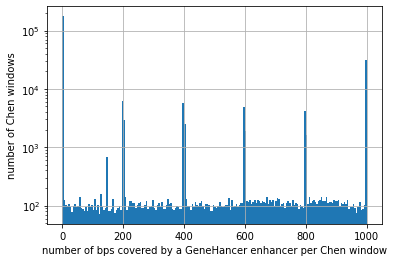

In [8]:
# Notice that there are peaks in the distribution at multiples of 200bp.
# These correspond to starts and ends of certain enhancers, 
# presumably those called from a low-resolution tiling approach.
# The other category of enhancer has greater spatial resolution, 
# resulting in the uniform distribution of bp coverage between the peaks. 

import numpy as np 

axis = chen_mchale_zscores_GeneHancer_enhancers['chen_enhancer_overlap_bps_total'].hist(bins=200)
axis.set_yscale('log')
axis.set_xlabel('number of bps covered by a GeneHancer enhancer per Chen window')
axis.set_ylabel('number of Chen windows')

In [9]:
def overlaps_enhancer(overlap): 
    if overlap == 0: 
        return False
    if overlap > min_window_enhancer_overlap: 
        return True 
    return 'ambiguous'

chen_mchale_zscores_GeneHancer_enhancers['chen_overlaps_enhancer'] = (
    chen_mchale_zscores_GeneHancer_enhancers['chen_enhancer_overlap_bps_total'].apply(overlaps_enhancer)
)
chen_mchale_zscores_GeneHancer_enhancers

<ipython-input-9-4188faf8aff9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chen_mchale_zscores_GeneHancer_enhancers['chen_overlaps_enhancer'] = (


,chromosome,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,chen_mchale_overlap_bps,chen_enhancer_overlap_bps_total,chen_overlaps_enhancer
0,chr1,1488000,1489000,-7.408229,1487914,1488915,1488414,4.747864,296,-0.170831,146,296,915,0,False
1,chr1,1493000,1494000,-4.474465,1492940,1493941,1493440,4.367401,264,-0.159818,132,264,941,0,False
2,chr1,1494000,1495000,-8.346688,1493941,1494942,1494441,3.720978,319,-0.427748,152,319,942,0,False
3,chr1,1528000,1529000,-6.760843,1527996,1528997,1528496,3.033436,301,-0.721886,141,301,997,0,False
4,chr1,1547000,1548000,-4.818747,1546920,1547921,1547420,0.495223,263,-1.322700,119,263,921,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257883,chr9,137507000,137508000,0.730697,137507084,137508085,137507584,-1.163353,225,-1.161295,107,225,916,1,ambiguous
257884,chr9,137598000,137599000,-1.792983,137597929,137598930,137598429,0.506926,237,-1.071359,112,237,930,199,True
257885,chr9,137599000,137600000,-2.525948,137598930,137599931,137599430,0.467112,233,-1.703156,105,233,931,200,True
257886,chr9,137620000,137621000,-3.753054,137620068,137621069,137620568,1.028901,229,0.072424,120,229,932,1000,True


In [10]:
chen_mchale_zscores_GeneHancer_enhancers = chen_mchale_zscores_GeneHancer_enhancers[
    (chen_mchale_zscores_GeneHancer_enhancers['chen_overlaps_enhancer'] == True) | 
    (chen_mchale_zscores_GeneHancer_enhancers['chen_overlaps_enhancer'] == False)
]
chen_mchale_zscores_GeneHancer_enhancers = chen_mchale_zscores_GeneHancer_enhancers.astype({'chen_overlaps_enhancer': bool})

In [11]:
# number examples: 
len(chen_mchale_zscores_GeneHancer_enhancers)

255410

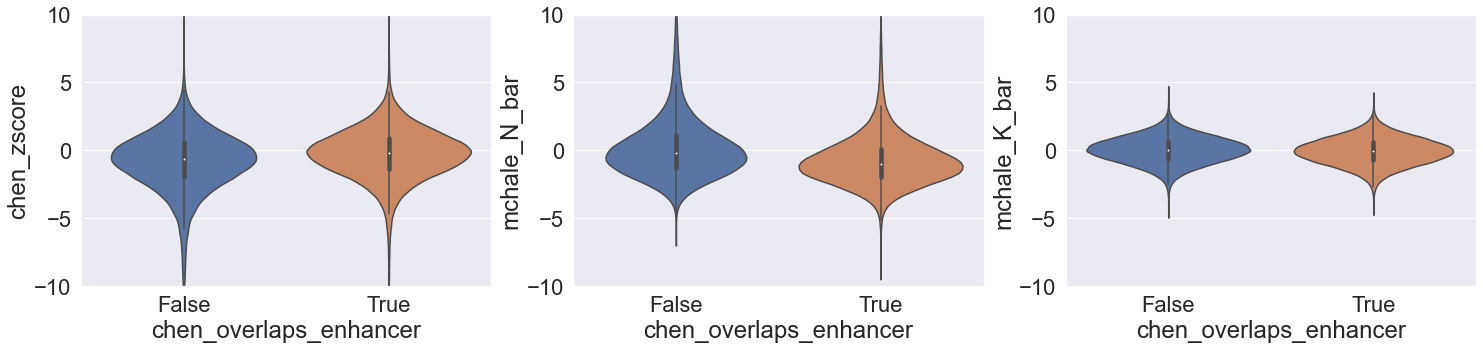

In [12]:
# the fact the two distributions in the following violin plots are largely overlapping
# suggests that a classifier built using any of these z-scores will have low precision and recall 

import seaborn as sns
sns.set(font_scale = 2)

import matplotlib.pyplot as plt 
fig, axs = plt.subplots(1, 3, figsize=(25,5))

for i, y in enumerate(['chen_zscore', 'mchale_N_bar', 'mchale_K_bar']):
    sns.violinplot(
        data=chen_mchale_zscores_GeneHancer_enhancers, 
        y=y, 
        x="chen_overlaps_enhancer",
        ax=axs[i]
    )
    axs[i].set_ylim([-10, 10])

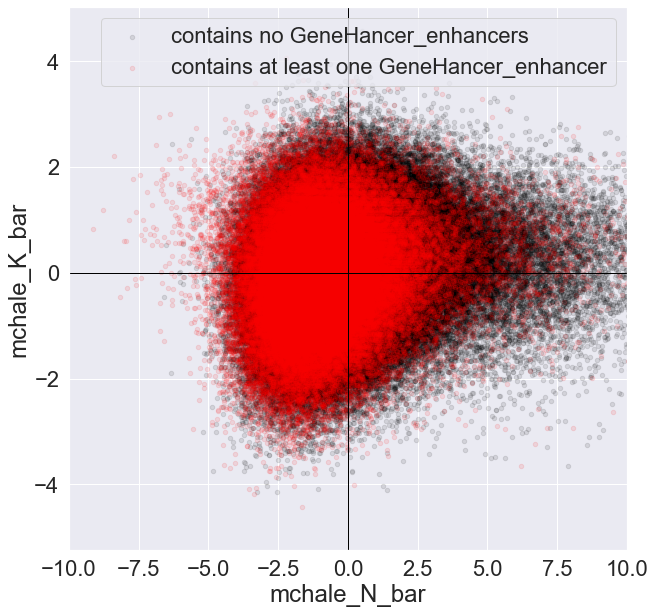

In [13]:
def scatter_plot(step_size=1): 
    df = chen_mchale_zscores_GeneHancer_enhancers.iloc[::step_size, :]
        
    df_false = df[
        df['chen_overlaps_enhancer'] == False
    ]
    df_true = df[
        df['chen_overlaps_enhancer'] == True
    ]
    
    # https://github.com/pandas-dev/pandas/issues/10611#issuecomment-522327555
    fig, axis = plt.subplots(figsize=(10,10))

    axis = df_false.plot.scatter(
#         x = 'chen_zscore',
        x = 'mchale_N_bar',
        y = 'mchale_K_bar',
        c = 'black',
        alpha = 0.1,
        ax = axis,
        label = 'contains no GeneHancer_enhancers'
    )

    axis = df_true.plot.scatter(
#         x = 'chen_zscore',
        x = 'mchale_N_bar',
        y = 'mchale_K_bar',
        c = 'red',
        alpha = 0.1,
        ax = axis,
        label = 'contains at least one GeneHancer_enhancer'        
    )

    axis.set_xlim(-10, 10)
#     axis.set_ylim(-10, 10)
    plt.legend()
    
    plt.axhline(linewidth=1, color='black')
    plt.axvline(linewidth=1, color='black')

    if step_size > 1:
        plt.title(f'downsampled {step_size}-fold')

# the fact that the two joint distributions in the following plot are largely overlapping, 
# suggests a classifer that uses both zscores will have low precision and recall 
scatter_plot(step_size=1)

In [14]:
def compute_bins(number_bins, z_min=-5, z_max=5): 
    bin_width = (z_max - z_min)/number_bins
    bins = np.arange(z_min, z_max+0.5*bin_width, bin_width)
    return bins
    
def aggregate_2d(grouped_windows, x, y, z, aggregation_function): 
    aggregated = grouped_windows.agg({z["column"]: [aggregation_function]})
    aggregated.columns = [f'{z["column"]}_{aggregation_function}']
    aggregated = aggregated.reset_index()
    
    # pivot the data into a 2d array 
    # https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-pivoting-dataframe-objects
    aggregated = aggregated.pivot(index=f'{y["column"]}_bin', columns=f'{x["column"]}_bin', values=f'{z["column"]}_{aggregation_function}')
    
    return aggregated
    
def plot_heat_map(df, x, y, z, count_threshold, ax, heat_map_type): 
    # https://pandas.pydata.org/docs/reference/api/pandas.cut.html
    df[f'{x["column"]}_bin'] = pd.cut(df[x['column']], bins=compute_bins(x['number_of_bins']))
    df[f'{y["column"]}_bin'] = pd.cut(df[y['column']], bins=compute_bins(y['number_of_bins']))

    grouped_windows = df.groupby([f'{x["column"]}_bin', f'{y["column"]}_bin'])
    
    sample_mean = aggregate_2d(grouped_windows, x, y, z, 'mean')
    sample_std = aggregate_2d(grouped_windows, x, y, z, 'std')
    
    sample_size = pd.DataFrame(grouped_windows.size())
    sample_size.columns = ['counts']
    sample_size = sample_size.reset_index()

    # pivot the data into a 2d array
    # https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-pivoting-dataframe-objects
    sample_size = sample_size.pivot(index=f'{y["column"]}_bin', columns=f'{x["column"]}_bin', values='counts')
    
    # https://en.wikipedia.org/wiki/Standard_error
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.divide.html
    standard_error_of_mean = sample_std / np.sqrt(sample_size)
    
    mask = sample_size < count_threshold

    if heat_map_type == 'GeneHancer_enhancer_enrichment':
        heat_map = sample_mean 
        heat_map_colorbar_label = z['GeneHancer_enhancer_enrichment_label']
    elif heat_map_type == 'GeneHancer_enhancer_enrichment_fractional_error': 
        heat_map = standard_error_of_mean/sample_mean
        heat_map_colorbar_label = z['fractional_error_label']
    else:
        raise ValueError
        
    # https://seaborn.pydata.org/generated/seaborn.heatmap.html
    sns.heatmap(
        heat_map, 
        cmap = 'BrBG', 
        center = None, 
        annot = True, 
        fmt = '.3f', 
        linewidths = .5, 
        cbar_kws = {'label': heat_map_colorbar_label},
        ax = ax,
        mask = mask
    )
    ax.invert_yaxis()
       
def plot_heat_maps(x_number_of_bins, y_number_of_bins, y_column):
    # sns.set(rc = {'figure.figsize': (10, 8)})
    sns.set(font_scale = 1)

    with sns.axes_style("white"):        
        fig, axs = plt.subplots(1, 2, figsize=(25,5))
        for i, heat_map_type in enumerate(['GeneHancer_enhancer_enrichment', 'GeneHancer_enhancer_enrichment_fractional_error']):
            plot_heat_map(
                df = chen_mchale_zscores_GeneHancer_enhancers,
                x = {
                    'column': 'mchale_N_bar',
                    'number_of_bins': x_number_of_bins
                },
                y = { 
                    'column': y_column,
                    'number_of_bins': y_number_of_bins
                },
                z = {
                    'column': 'chen_overlaps_enhancer',
                    'GeneHancer_enhancer_enrichment_label': 'fraction of Chen windows that overlap a GeneHancer_enhancer',
                    'fractional_error_label': 'fractional error of GeneHancer_enhancer enrichment'
                },
                count_threshold = 1e3,
                ax = axs[i],
                heat_map_type = heat_map_type,
            )

## McHale's N_bar appears to explain more of the variance in enhancer fraction than Chen's zscore (c.f. Fig 2a of Chen et al 2022)

Note also the correlation between the z-scores, as demonstrated in 

```
experiments/germline-model/chen-et-al-2022/Fig_1a.ipynb 
```

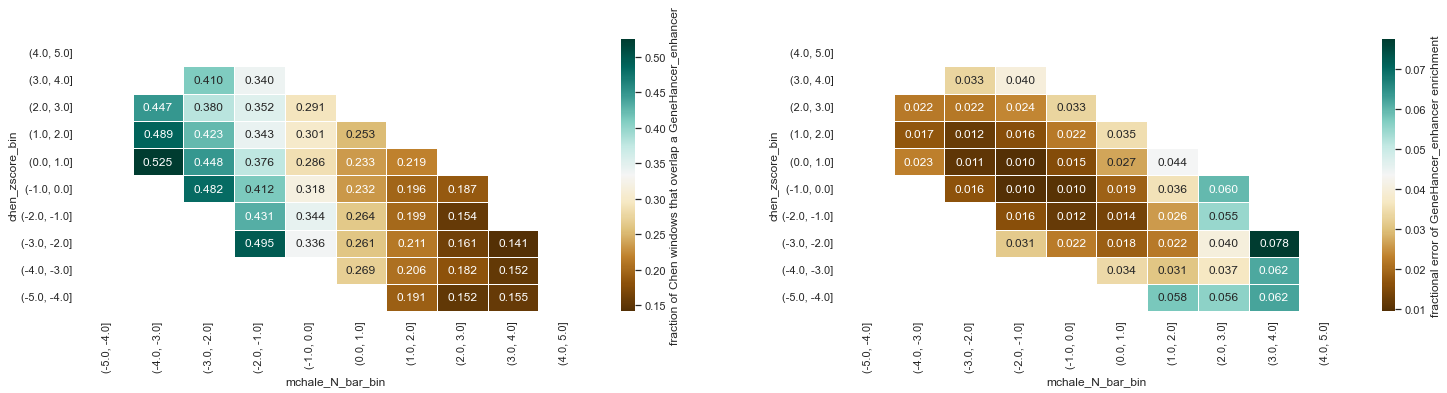

In [15]:
plot_heat_maps(
    x_number_of_bins=10, 
    y_number_of_bins=10,
    y_column='chen_zscore'
)

## McHale's K_bar in conjunction with McHale's N_bar appears to explain more of the variance in enhancer fraction than McHale's N_bar can by itself 

Note the absence of correlation between mchale_K_bar and chen_zscore, as demonstrated in 

```
experiments/germline-model/chen-et-al-2022/Fig_1a.ipynb
```


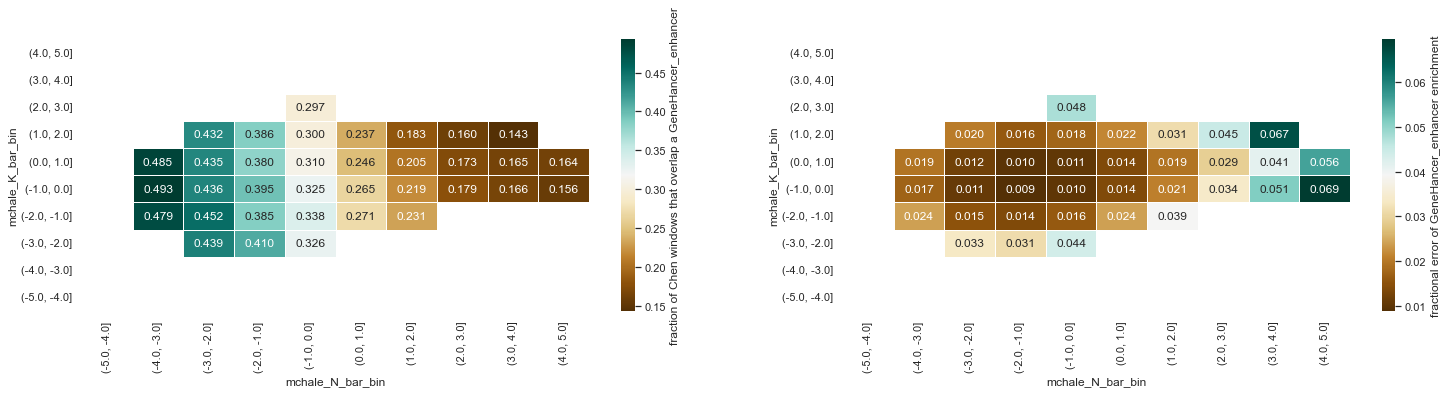

In [16]:
plot_heat_maps(
    x_number_of_bins=10, 
    y_number_of_bins=10,
    y_column='mchale_K_bar'
)

## Why this is a model-selection exercise, and not just a goodness-of-fit test

One could use Analysis of Variance/F-test approaches to quantify and support the assertion that SNV and singleton counts together explain more of the variation in constraint than SNV counts alone. See, e.g., Section 10.6 of Probability and Statistics for Engineers and Scientists, 4th edition, by Sheldon Ross. 

Ultimately, though, we wish to demonstrate that considering SNV density and singleton density leads to a more *predictive* 
model of constraint than using SNV density alone. Note, though, that the models we construct are not predictive in a practical sense, as the distributions of z-scores, conditioned on each class (contains GeneHancer enhancer or not), overlap considerably, resulting in very poor recall and FDR, as quantified by the following confusion matrix for a bare-bones classifier: 





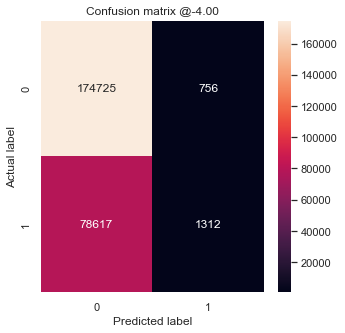

In [17]:
# baseline classifier

from sklearn.metrics import confusion_matrix

def plot_cm(labels, zscores, threshold):
    cm = confusion_matrix(labels, zscores < threshold)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(threshold))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
plot_cm(
    labels=np.array(chen_mchale_zscores_GeneHancer_enhancers['chen_overlaps_enhancer'].astype(int)), 
    zscores=np.array(chen_mchale_zscores_GeneHancer_enhancers['mchale_N_bar']), 
    threshold=-4
)

**Nevertheless, a model that predicts the probability that a window is constrained is useful, 
as one can meaningfully rank variants by the predicted probabilities of the windows they lie in.**

Consequently, we choose to formulate the problem as an example of model selection, 
as described below. 
(The F test, mentioned above, is actually a special case of the much more general likelihood ratio test, which we use below to select models, c.f., p9 of https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/10/lecture-10.pdf)

## A Gaussian Naive-Bayes model 

We fit a Naive-Bayes model in which the likelihood is assumed to be Gaussian, with 
independent features `mchale_K_bar` and `mchale_N_bar`. (For more on Gaussian Naive Bayes, see https://gist.github.com/petermchale/0aa9b944edb0bb18e4701044dd915d66 ) 

The estimated parameters show that the mean of the joint distribution of `mchale_K_bar` and `mchale_N_bar` for windows harboring a GeneHancer enhancer is shifted to the left and down relative to that for windows not harboring a GeneHancer enhancer, consistent with our heat map showing that the probability of harboring a GeneHancer enhancer increases with decreasing `mchale_N_bar` and decreasing `mchale_K_bar`. 

The predicted probabilites under the model have magnitudes and contours (as a function of `mchale_N_bar` and `mchale_K_bar`)
that are consistent with the heat map shown above. 

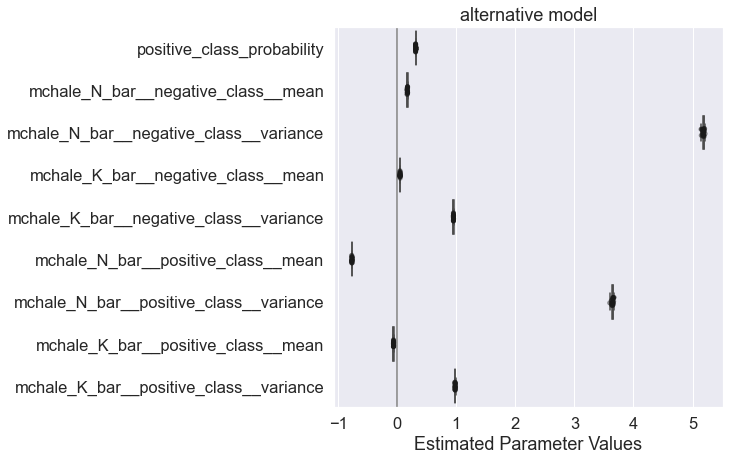

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

sns.set(font_scale = 1.5)    

def compute_X(predictors): 
    X = chen_mchale_zscores_GeneHancer_enhancers[predictors]
    return X

def compute_y(): 
    return chen_mchale_zscores_GeneHancer_enhancers['chen_overlaps_enhancer']
   
from sklearn.preprocessing import FunctionTransformer

def compute_pipe(): 
    # naive bayes: 
    # https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes
    # https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

    # mean removal and variance scaling
    # https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
    
    # identity transform: 
    # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html    

    # return make_pipeline(StandardScaler(), GaussianNB())
    return make_pipeline(FunctionTransformer(), GaussianNB())

def compute_pipe_X_y(predictors): 
    X = compute_X(predictors)
    y = compute_y()
    pipe = compute_pipe()  
    return pipe, X, y

def get_estimated_parameter_values(gaussian_naive_bayes_model, predictors, classes=['negative', 'positive']): 
    parameter_values = [gaussian_naive_bayes_model.class_prior_[1]]
    for i, class_ in enumerate(classes): 
        for j, predictor in enumerate(predictors): 
            parameter_values += [gaussian_naive_bayes_model.theta_[i,j], gaussian_naive_bayes_model.var_[i,j]]
    return parameter_values
    
def get_estimated_parameter_names(predictors, classes=['negative', 'positive']): 
    parameter_names = ['positive_class_probability']
    for i, class_ in enumerate(classes): 
        for j, predictor in enumerate(predictors): 
            parameter_names += [f'{predictor}__{class_}_class__mean', f'{predictor}__{class_}_class__variance'] 
    return parameter_names 

def plot_estimated_parameters(predictors, title): 
    pipe, X, y = compute_pipe_X_y(predictors)
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)
    cv_output = cross_validate(
        pipe,
        X,
        y,
        cv=cv,
        return_estimator=True,
        n_jobs=-1, # n_jobs = -1 means using all processors
    )
    models = cv_output["estimator"]

    # https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#checking-the-variability-of-the-coefficients
    # NOTE: another approach to computing feature importance is: https://scikit-learn.org/stable/modules/permutation_importance.html
    estimated_parameters = pd.DataFrame(
        [
            get_estimated_parameter_values(model.get_params()['gaussiannb'], predictors) 
            for model in models
        ],
        columns=get_estimated_parameter_names(predictors),
    )

    plt.figure(figsize=(9, 7))
    sns.stripplot(data=estimated_parameters, orient="h", color="k", alpha=0.5)
    sns.boxplot(data=estimated_parameters, orient="h", color="cyan", saturation=0.5, whis=10)
    plt.axvline(x=0, color=".5")
    plt.xlabel("Estimated Parameter Values")
    plt.subplots_adjust(left=0.3)
    plt.title(title)

plot_estimated_parameters(
    predictors=[
        'mchale_N_bar',
        'mchale_K_bar'
    ],
    title='alternative model'
)


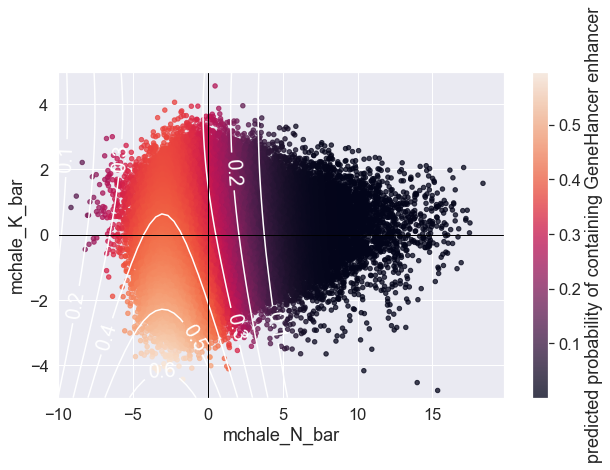

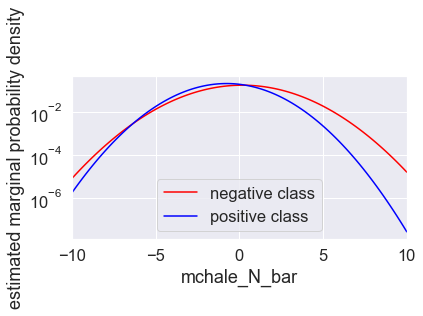

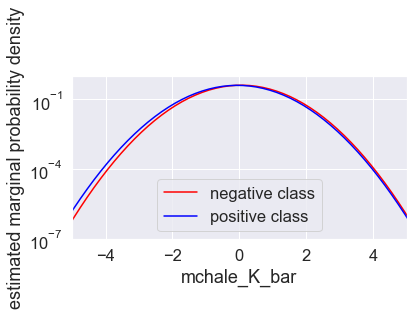

In [19]:
def plot_contours(model_):
    X_1d, Y_1d = np.linspace(-10, 10, 50), np.linspace(-5, 5, 50)
    X_2d, Y_2d = np.meshgrid(X_1d, Y_1d)
    Z = np.zeros((len(Y_1d), len(X_1d)))
    for i in range(len(Y_1d)): 
        for j in range(len(X_1d)):
            xx, yy = X_1d[j], Y_1d[i]
            import warnings
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                Z[i, j] = model_.predict_proba([[xx, yy]])[0,1]            
    contours = plt.contour(X_2d, Y_2d, Z, colors='white')
    plt.clabel(contours, inline=True, fontsize=20)

def plot_predicted_probabilities(predictors, step_size):
    pipe, X, y = compute_pipe_X_y(predictors)

    pipe.fit(X, y)

    X_2d = compute_X(predictors=[
        'mchale_N_bar',
        'mchale_K_bar'
    ])
    X_2d = X_2d.iloc[::step_size, :]
    
    predicted_probabilites = pipe.predict_proba(X_2d[predictors])

    # https://github.com/pandas-dev/pandas/issues/10611#issuecomment-522327555
    fig, axis = plt.subplots(figsize=(10,6))
    plt.scatter(X_2d['mchale_N_bar'], X_2d['mchale_K_bar'], c=predicted_probabilites[:,1], 
#                 cmap='RdBu', 
                s=20, alpha=0.75) 
    plt.xlabel('mchale_N_bar')
    plt.ylabel('mchale_K_bar')
    cbar = plt.colorbar()
    cbar.set_label('predicted probability of containing GeneHancer enhancer')
    plt.axhline(linewidth=1, color='black')
    plt.axvline(linewidth=1, color='black')
    if step_size > 1:
        plt.title(f'downsampled {step_size}-fold')
        
    if len(predictors) == 2: 
        plot_contours(pipe)
    plt.show() 
    
    def plot_gaussian(mu, variance, label, color): 
        import scipy.stats as stats
        import math
        sigma = math.sqrt(variance)
        x = np.linspace(-10, 10, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=label, color=color)
    
    model = pipe.get_params()['gaussiannb']
    
    fig, axis = plt.subplots(figsize=(6,3))
    plot_gaussian(model.theta_[0][0], model.var_[0][0], 'negative class', 'red')
    plot_gaussian(model.theta_[1][0], model.var_[1][0], 'positive class', 'blue')
    plt.xlabel('mchale_N_bar')
    plt.ylabel('estimated marginal probability density')
    plt.legend()
    plt.xlim([-10, 10])
    plt.yscale('log')
    plt.show()        
    
    if len(predictors) == 2: 
        fig, axis = plt.subplots(figsize=(6,3))
        plot_gaussian(model.theta_[0][1], model.var_[0][1], 'negative class', 'red')
        plot_gaussian(model.theta_[1][1], model.var_[1][1], 'positive class', 'blue')
        plt.xlabel('mchale_K_bar')
        plt.ylabel('estimated marginal probability density')
        plt.legend()
        plt.xlim([-5, 5])
        plt.ylim([1e-7, 1e0])
        plt.yscale('log')
        plt.show()        

plot_predicted_probabilities(
    predictors=[
        'mchale_N_bar',
        'mchale_K_bar'
    ],
    step_size=1
)

## A simpler Gaussian Naive-Bayes model

The model above uses two features: `mchale_N_bar` and `mchale_K_bar`. We next consider a Gaussian Naive-Bayes model 
using just one feature: `mchale_N_bar`. 

Fitting this model yields similar values for the parameters shared by both models,
but the contours of the predicted probability surface are qualitatively different from 
those of the heat map shown above. 




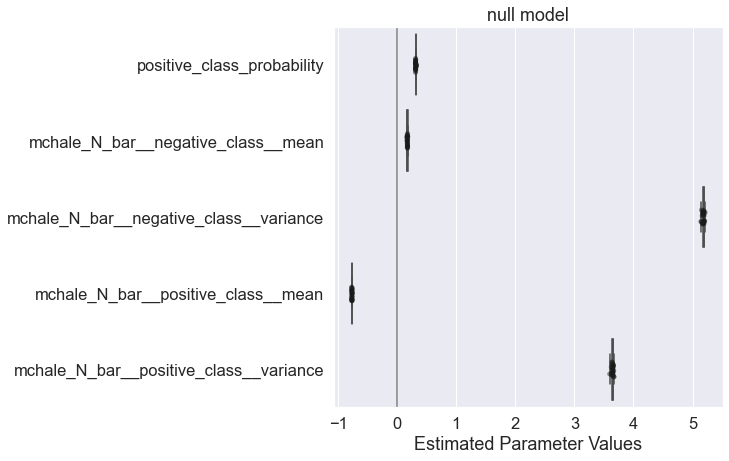

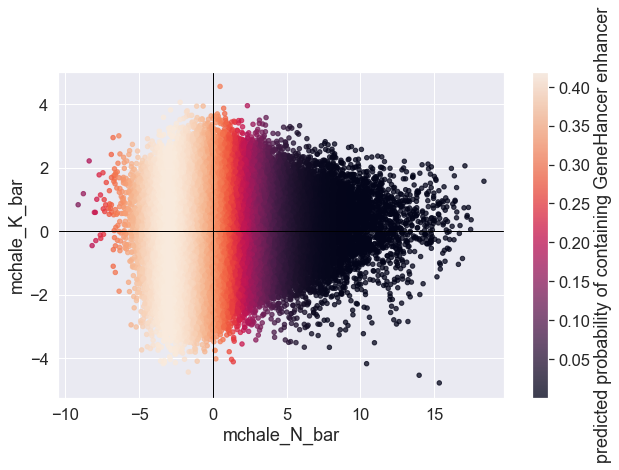

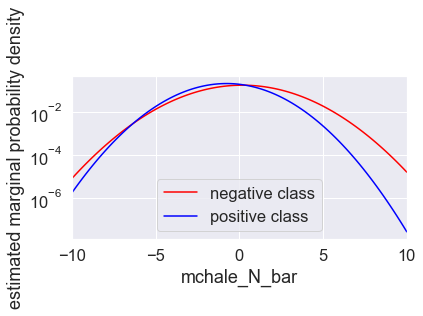

In [20]:
plot_estimated_parameters(
    predictors=['mchale_N_bar'],
    title='null model'
)

plot_predicted_probabilities(
    predictors=[
        'mchale_N_bar',
    ],
    step_size=1
)

## Learning curves

In [21]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(predictors):  
    pipe, X, y = compute_pipe_X_y(predictors)

    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html
    # shuffle=True: https://stackoverflow.com/a/52368329
    train_sizes, train_scores, test_scores = learning_curve(
        pipe, 
        X, 
        y, 
        scoring='neg_log_loss', 
        shuffle=True, 
        train_sizes=[
            100,
            200, 
            500, 
            750,
            1000, 
            2000, 
            5000,
            7000,
            10000, 
            20000,
            50000,
            80000,
            100000,
            150000,
            180000
    ])
    # average over cross validation folds:
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 
             'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 
             'o-', color="g", label="Cross-validation score")

    plt.xlabel("Training set size")
    plt.ylabel('Log likelihood per example')

    plt.legend(loc="best")
    plt.xscale('log')


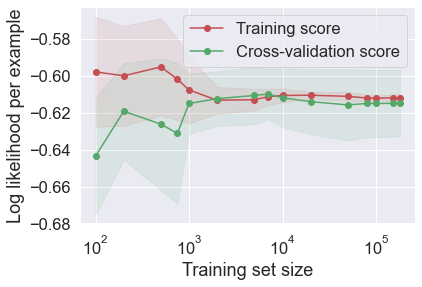

In [22]:
# null model 
plot_learning_curve(predictors=['mchale_N_bar'])

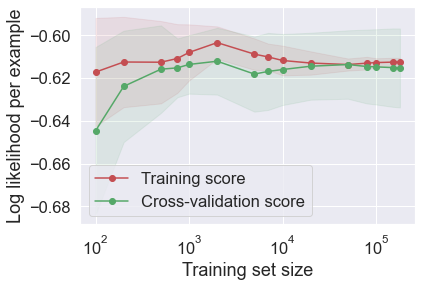

In [23]:
# alternative model 
plot_learning_curve(predictors=[
    'mchale_N_bar',
    'mchale_K_bar'
])

## The null model (using just `x = mchale_N_bar`) is a constrained version of the alternative model (using both `x = mchale_N_bar` and `y = mchale_K_bar`)

Under the assumption of "naive" conditional independence, the alternative model is: 

$$ 
p(l | x, y) = \frac{p(x | l) p(y | l) p(l)}{\sum_{m} p(x | m) p(y | m) p(m)}
$$

where $l$ and $m$ denote class labels. 

If we further assume that the distributions of $y$ for each label coincide, 

$$ 
p(y | l) = f(y),
$$ 

then $f(y)$ cancels in the numerator and denominator of the first equation, leaving: 

$$ 
p(l | x, y) = \frac{p(x | l) p(l)}{p(x)} = p(l | x), 
$$

which is the null model. 


## The Likelihood Ratio Test yields nonsensical values

Since the null model is a constrained version of the alternative model, we may attempt to apply the Likelihood Ratio Test,
c.f. https://gist.github.com/petermchale/5272f54dd51a1b6d51c41f9bbda6b56d

In [24]:
from scipy.stats import chi2
from sklearn.metrics import log_loss

def compute_pvalue_core(features_alternate, features_null, labels, model):
    # based upon: 
    # https://gist.github.com/rnowling/ec9c9038e492d55ffae2ae257aa4acd9
    
    features_alternate = np.array(features_alternate)
    features_null = np.array(features_null)
    labels = np.array(labels)
 
    if features_null.shape[1] >= features_alternate.shape[1]:
        raise ValueError("Alternate features must have more features than null features")

    model.fit(features_alternate, labels)
    alternate_probabilities = model.predict_proba(features_alternate)[:, 1]

    model.fit(features_null, labels)
    null_probabilities = model.predict_proba(features_null)[:, 1]    
    
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html
    alternate_maximum_log_likelihood = -log_loss(labels, alternate_probabilities, normalize=False)
    null_maximum_log_likelihood = -log_loss(labels, null_probabilities, normalize=False)

    test_statistic = 2 * (alternate_maximum_log_likelihood - null_maximum_log_likelihood)
    print(f'test_statistic: {test_statistic}')

    chi2_degrees_of_freedom = features_alternate.shape[1] - features_null.shape[1]
    
    # chi2.sf is the survival function (also defined as 1 - cdf)
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html
    p_value = chi2.sf(test_statistic, chi2_degrees_of_freedom)

    return p_value

def compute_pvalue(): 
    X_alternate = compute_X(predictors=[
        'mchale_N_bar',
        'mchale_K_bar'
    ])
    X_null = compute_X(predictors=[
        'mchale_N_bar',
    ])
    y = compute_y()
    pipe = compute_pipe()

    return compute_pvalue_core(features_alternate=X_alternate, features_null=X_null, labels=y, model=pipe)
    
print(f'p-value: {compute_pvalue()}')

test_statistic: -173.86735918564955
p-value: 1.0


## Comment on nonsensical value of Likelihood Ratio Statistic 

The estimated parameter values of the "y"-gaussian of the alternative model can never be exactly the same in sklearn because sklearn computes those values from the data directly (e.g., computing sample mean of y values to get a MLE of the mean of the gaussian), instead of doing gradient descent. Therefore the fitted alternative model can never have a likelihood that is exactly the same as the null model, implying that the we can never get a Likelihood Ratio statistic of zero. In other words, the subspace of parameter space of the alternative model that corresponds to the null model is not actually accessible using sklearn’s naive bayes algorithm.


## Choice of model significantly affects window ranking 


In [25]:
def add_predicted_probability_to_dataframe(predictors, model_name):
    pipe, X, y = compute_pipe_X_y(predictors)
    pipe.fit(X, y)
    predicted_probabilities = pipe.predict_proba(X)[:,1]
    root_column_name = f'probability_of_containing_GeneHancer_enhancer_under_{model_name}'
    chen_mchale_zscores_GeneHancer_enhancers[root_column_name] = predicted_probabilities
    
    quantile_name, number_of_quantiles = 'percentile', 100
    chen_mchale_zscores_GeneHancer_enhancers[f'{root_column_name}_{quantile_name}'] = pd.qcut(
        chen_mchale_zscores_GeneHancer_enhancers[root_column_name], 
        number_of_quantiles, 
        labels=False
    )

add_predicted_probability_to_dataframe(
    predictors=[
        'mchale_N_bar',
        'mchale_K_bar'
    ],
    model_name='alternative_model'
)

add_predicted_probability_to_dataframe(
    predictors=[
        'mchale_N_bar',
    ],
    model_name='null_model'
)

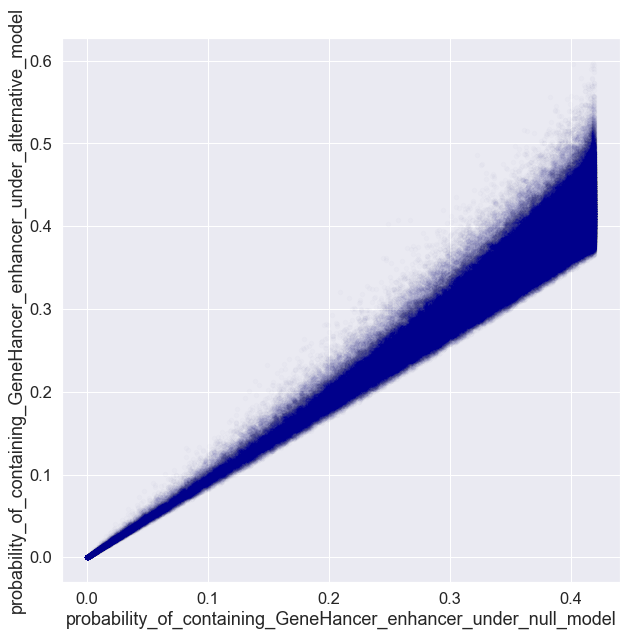

In [26]:
fig, axis = plt.subplots(figsize=(10,10))

_ = chen_mchale_zscores_GeneHancer_enhancers.plot.scatter(
    x='probability_of_containing_GeneHancer_enhancer_under_null_model',
    y='probability_of_containing_GeneHancer_enhancer_under_alternative_model',
    c='DarkBlue',
    alpha=0.01,
    ax = axis    
)

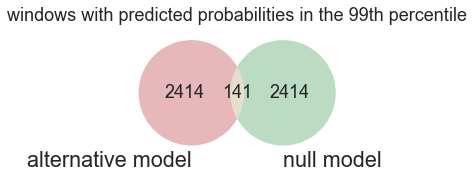

In [27]:
from matplotlib_venn import venn2

percentile = 99

top_ranked_windows_under_alternative_model = chen_mchale_zscores_GeneHancer_enhancers[chen_mchale_zscores_GeneHancer_enhancers['probability_of_containing_GeneHancer_enhancer_under_alternative_model_percentile'] == percentile]
top_ranked_windows_under_null_model = chen_mchale_zscores_GeneHancer_enhancers[chen_mchale_zscores_GeneHancer_enhancers['probability_of_containing_GeneHancer_enhancer_under_null_model_percentile'] == percentile]

ids_of_top_ranked_windows_under_alternative_model = set(top_ranked_windows_under_alternative_model.index)
ids_of_top_ranked_windows_under_null_model = set(top_ranked_windows_under_null_model.index)

plt.figure(figsize=(4,4))
venn2(
    [
        ids_of_top_ranked_windows_under_alternative_model, 
        ids_of_top_ranked_windows_under_null_model
    ], 
    set_labels = (
        'alternative model', 
        'null model'
    )
)
_ = plt.title(f'windows with predicted probabilities in the {percentile}th percentile')

## NOTE 
At some point, we might want to estimate the uncertainty in the predicted probabilities reported by the models, see, e.g., https://www.gatsby.ucl.ac.uk/~balaji/balaji-uncertainty-talk-cifar-dlrl.pdf For now, we assume no uncertainty in the predicted probabilities, and use them to rank windows. 

## Logistic regression model captures regions of feature space with greatest chance of overlapping enhancers

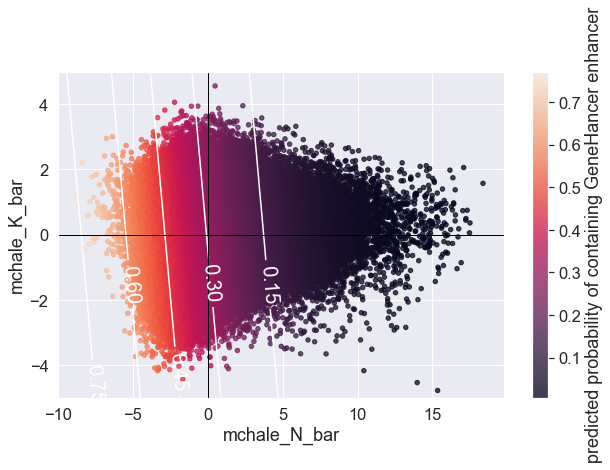

In [28]:
def plot_predicted_probabilities_logistic():
    X = chen_mchale_zscores_GeneHancer_enhancers[['mchale_N_bar', 'mchale_K_bar']]
    y = chen_mchale_zscores_GeneHancer_enhancers['chen_overlaps_enhancer']

    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()

    model.fit(X, y)

    predicted_probabilites = model.predict_proba(X)
    chen_mchale_zscores_GeneHancer_enhancers[
        'probability_of_containing_GeneHancer_enhancer_under_logistic_regression'
    ] = predicted_probabilites[:,1]

    # https://github.com/pandas-dev/pandas/issues/10611#issuecomment-522327555
    fig, axis = plt.subplots(figsize=(10,6))
    plt.scatter(
        X['mchale_N_bar'], 
        X['mchale_K_bar'], 
        c=predicted_probabilites[:,1], 
        # cmap='RdBu', 
        s=20, 
        alpha=0.75
    ) 
    plt.xlabel('mchale_N_bar')
    plt.ylabel('mchale_K_bar')
    cbar = plt.colorbar()
    cbar.set_label('predicted probability of containing GeneHancer enhancer')
    plt.axhline(linewidth=1, color='black')
    plt.axvline(linewidth=1, color='black')
    
    plot_contours(model)

plot_predicted_probabilities_logistic()

## Windows with extreme values of McHale's N_bar are more likely to overlap an enhancer  than windows with similarly extreme values of Chen's zscore 

In [29]:
chen_mchale_zscores_GeneHancer_enhancers['chen_negative_zscore'] = -chen_mchale_zscores_GeneHancer_enhancers['chen_zscore']
chen_mchale_zscores_GeneHancer_enhancers['mchale_negative_N_bar'] = -chen_mchale_zscores_GeneHancer_enhancers['mchale_N_bar']
chen_mchale_zscores_GeneHancer_enhancers['mchale_negative_K_bar'] = -chen_mchale_zscores_GeneHancer_enhancers['mchale_K_bar']

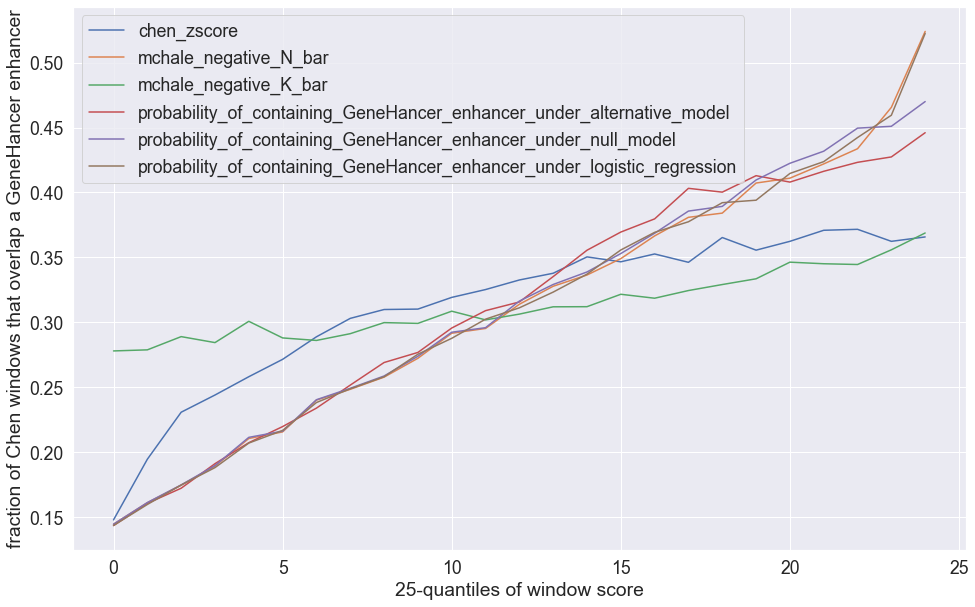

In [30]:
def compute_enhancerFraction_vs_quantile(score, number_of_quantiles): 
    chen_mchale_zscores_GeneHancer_enhancers[f'{score}_quantile'] = pd.qcut(
        chen_mchale_zscores_GeneHancer_enhancers[score], 
        number_of_quantiles, 
        labels=False
    )
    
    groups = chen_mchale_zscores_GeneHancer_enhancers.groupby([f'{score}_quantile'])
    aggregated = groups.agg({
        'chen_overlaps_enhancer': ['mean'],
        score: ['mean', 'std']
    })
    
    quantiles = np.array(aggregated.index)
    fraction_overlap_enhancer = np.array(aggregated['chen_overlaps_enhancer']).flatten()
    return quantiles, fraction_overlap_enhancer 

sns.set(font_scale = 1.6)
fig, axis = plt.subplots(figsize=(16,10))

number_of_quantiles = 25

for score in [
    'chen_zscore',
    'mchale_negative_N_bar',
    'mchale_negative_K_bar',
    'probability_of_containing_GeneHancer_enhancer_under_alternative_model', 
    'probability_of_containing_GeneHancer_enhancer_under_null_model', 
    'probability_of_containing_GeneHancer_enhancer_under_logistic_regression'
]: 
    x, y = compute_enhancerFraction_vs_quantile(score, number_of_quantiles)
    plt.plot(x, y, label=score)
    
plt.xlabel(f'{number_of_quantiles}-quantiles of window score')
plt.ylabel('fraction of Chen windows that overlap a GeneHancer enhancer')    
plt.legend()

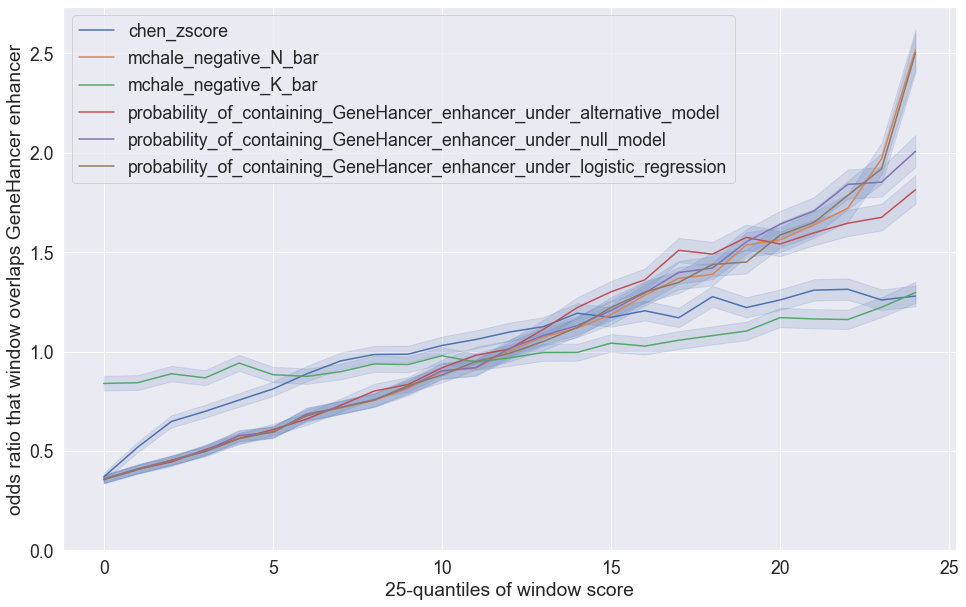

In [31]:
def compute_OR(score, number_of_quantiles, quantile): 
    window_score_is_in_quantile = pd.qcut(
        chen_mchale_zscores_GeneHancer_enhancers[score], 
        number_of_quantiles, 
        labels = False
    ) == quantile 
    window_score_is_in_quantile = window_score_is_in_quantile.rename('window_score_is_in_quantile')

    window_overlaps_enhancer = chen_mchale_zscores_GeneHancer_enhancers['chen_overlaps_enhancer']
    window_overlaps_enhancer = window_overlaps_enhancer.rename('window_overlaps_enhancer')
    
    # contingency table 
    counts_df = pd.crosstab(
        index = window_score_is_in_quantile, 
        columns = window_overlaps_enhancer,
    )
    counts = np.array(counts_df)
    OR_hat = counts[0,0]*counts[1,1]/(counts[0,1]*counts[1,0])

    LOR_hat = np.log(OR_hat)
    LOR_hat_std = np.sqrt(np.sum(1/counts))
    LOR_confidence_interval = LOR_hat + np.array([-1, 1])*1.96*LOR_hat_std
    
    OR_confidence_interval = np.exp(LOR_confidence_interval)
    ci_lower, ci_upper = OR_confidence_interval[0], OR_confidence_interval[1]

    return quantile, OR_hat, ci_lower, ci_upper
  
def compute_OR_vs_quantile(score, number_of_quantiles): 
    quantiles, ORs, ci_lowers, ci_uppers = [], [], [], []
    for quantile in range(number_of_quantiles):
        quantile, OR_hat, ci_lower, ci_upper = compute_OR(
            score,
            number_of_quantiles,
            quantile
        )
        quantiles.append(quantile)
        ORs.append(OR_hat) 
        ci_lowers.append(ci_lower)
        ci_uppers.append(ci_upper)
    return quantiles, ORs, ci_lowers, ci_uppers

sns.set(font_scale = 1.6)
fig, axis = plt.subplots(figsize=(16,10))

for score in [
    'chen_zscore',
    'mchale_negative_N_bar',
    'mchale_negative_K_bar',
    'probability_of_containing_GeneHancer_enhancer_under_alternative_model', 
    'probability_of_containing_GeneHancer_enhancer_under_null_model', 
    'probability_of_containing_GeneHancer_enhancer_under_logistic_regression'
]: 
    quantiles, ORs, ci_lowers, ci_uppers = compute_OR_vs_quantile(score, number_of_quantiles)
    sns.lineplot(x=quantiles, y=ORs, label=score)
    plt.fill_between(quantiles, ci_lowers, ci_uppers, color='b', alpha=.15)

plt.xlabel(f'{number_of_quantiles}-quantiles of window score')
plt.ylabel('odds ratio that window overlaps GeneHancer enhancer')    
plt.ylim(bottom=0)
plt.legend()

In [32]:
# Is it significant that the score with best enrichment changes with position along the x-axis?